# 简介

## 张量
张量是一个多维数组，它是标量、向量、矩阵的高维拓展。  

<img src="img/张量.png" width="600">

## Variable
`Variable`是`torch.autograd`中的数据类型，主要用于封装`Tensor`，进行自动求导  

<img src="img/variable.png" width="300">  

* data：被包装的Tensor
* grad：data的梯度
* grad_fn：创建Tensor的Function，是自动求导的关键
* requires_grad：指示是否需要梯度
* is_leaf：指示是否是叶子节点（张量）

## Tensor
PyTorch0.4.0版开始，Variable并入Tensor。  

<img src="img/tensor.png" width="400">

* dtype：张量的数据类型，如`torch.FloatTensor`，`torch.cuda.FloatTensor`
* shape：张量的形状，如(64,3,224,224)
* device：张量所在设备，GPU/CPU，是加速的关键

# Tensor创建

## 直接创建

### torch.tensor()
功能：从data创建tensor  
参数：
* data：数据，可以是list、numpy
* dtype：数据类型，默认与data的一致
* device：所在设备，cuda/cpu
* required_grad：是否需要梯度
* pin_memory：是否存于锁页内存

In [1]:
import numpy as np
import torch

In [2]:
arr = np.ones((3,3))
print(arr)
# 将数据从cpu转移到gpu需要一定时间
t = torch.tensor(arr,device='cuda')
print(t)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0', dtype=torch.float64)


### torch.from_numpy(ndarray) 
功能：从numpy创建tensor  
注意事项：从torch.from_numpy创建的tensor与原ndarray共享内存，当修改其中一个的数据，另外一个也将会被改动

In [3]:
arr = np.array([[1,2,3],[4,5,6]])
print(arr)
t = torch.from_numpy(arr)
print(t)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [4]:
# 修改arr的数据，t的数据也会改变
arr[0,0] = 0
print(arr)
print(t)

[[0 2 3]
 [4 5 6]]
tensor([[0, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


## 依据数值创建

### torch.zeros()
功能：依size创建全0张量  
参数：  
* size：张量的形状，如(3,3)、(3,224,224)
* out：输出的张量
* layout：内存中布局形式，有`strided`，`sparse_coo`等
* device：所在设备，gpu/cpu
* required_grad：是否需要梯度

In [5]:
out_t = torch.tensor([1])
t = torch.zeros((3,3),out=out_t)
print(t,'\n',out_t)
# t和out_t共享内存
print(id(t),id(out_t),id(t)==id(out_t))  

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) 
 tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
2262593454384 2262593454384 True


### torch.zeros_like() 
功能：依input形状创建全0张量  
参数：  
* input：创建与input同形状的全0张量
* dtype：数据类型
* layout：内存中布局形式

### torch.ones()/torch.ones_like()
功能：创建全1张量  
参数：  
* size：张量的形状，如(3,3)、(3,224,224)
* dtype：数据类型
* layout：内存中布局形式
* device：所在设备，gpu/cpu
* required_grad：是否需要梯度
* input:创建与input同形状的全1张量

### torch.full()/torch.full_like()
功能：创建全为自定义数值张量  
参数：  
* size：张量的形状，如(3,3)、(3,224,224)
* fill_value：张量的值
* dtype：数据类型
* layout：内存中布局形式
* device：所在设备，gpu/cpu
* required_grad：是否需要梯度
* input:创建与input同形状的自定义数值张量

In [6]:
t = torch.full((3,3),10)
print(t)

tensor([[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]])


### torch.arange()
功能：创建等差的1维张量，数值区间为[start,end]  
参数：  
* start：数列起始值
* end：数列结束值（取不到）
* step：步长

In [7]:
t = torch.arange(2,10,2)
print(t)

tensor([2, 4, 6, 8])


### torch.linspace()
功能：创建均分的1维张量，数值区间为[start,end]  
参数：  
* start：数列起始值
* end：数列结束值
* step：步长

In [8]:
t = torch.linspace(2,10,5)
print(t)

tensor([ 2.,  4.,  6.,  8., 10.])


### torch.eye()
功能：创建单位对角矩阵（2维张量），默认为方阵  
参数：  
* n：行数
* m：列数

In [9]:
t = torch.eye(3)
print(t)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [10]:
t = torch.eye(n=3,m=2)
print(t)

tensor([[1., 0.],
        [0., 1.],
        [0., 0.]])


## 依据概率创建

### torch.normal()
功能：生成正态分布  
参数：  
* mean：均值
* std：标准差

四种模式
    
- 1. mean为标量，std为标量
- 2. mean为标量，std为张量 
- 3. mean为张量，std为标量
- 4. mean为张量，std为张量

In [11]:
# 均值和标准差都为张量
mean = torch.arange(1,5,dtype=torch.float)
std = torch.arange(1,5,dtype=torch.float)
# 分别从N(1,1),N(2,4),N(3,9),N(4,16)的正态分布中随机采样得到
torch.normal(mean,std)

tensor([0.1324, 1.6407, 1.3306, 6.0258])

In [12]:
# 均值和标准差都为标量
mean = 0
std = 1
# 从N(0,1)的正态分布中采样得到4个数据
torch.normal(mean,std,size=(4,))

tensor([ 0.1033, -1.6006,  1.0646,  1.2337])

In [13]:
# 均值为张量，标准差为标量
mean = torch.arange(1,5,dtype=torch.float)
std = 1
# 分别从N(1,1),N(2,1),N(3,1),N(4,1)的正态分布中随机采样得到
torch.normal(mean,std)

tensor([-0.1743,  1.5678,  3.8844,  3.5849])

In [14]:
# 均值为标量，标准差为张量
mean = 0
std = torch.arange(1,5,dtype=torch.float)
# 分别从N(0,1),N(0,4),N(0,9),N(0,16)的正态分布中随机采样得到
torch.normal(mean,std)

tensor([-1.5222, -1.8742,  0.0183,  5.7265])

### torch.randn()/torch.randn_like()
功能：生成标准正态分布  
参数：  
* size：张量的形状

### torch.rand()/torch.rand_like()
功能：生成均匀分布  
参数：  
* size：张量的形状

### torch.randint()/torch.randint_like()
功能：生成整数均匀分布  
参数：  
* size：张量的形状

### torch.randperm()
功能：生成从0到n-1的随机排列  
参数：  
* n：张量的长度

In [15]:
torch.randperm(6)

tensor([2, 4, 3, 1, 0, 5])

### torch.bernoulli()
功能：以input为概率，生成伯努利分布（0-1分布、二项分布）  
参数：  
* input：概率值

In [16]:
torch.bernoulli(torch.tensor([0.2,0.8]))

tensor([0., 1.])

# Tensor操作

## 拼接

### torch.cat()
功能：将张量按维度dim进行拼接   
参数：  
* tensors：张量序列
* dim：要拼接的维度，0表示在第0维上拼接，1表示在第1维上拼接

In [17]:
t = torch.ones((2,3))
torch.cat([t,t],0)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [18]:
torch.cat([t,t],1)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [19]:
torch.cat([t,t,t],1)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

### torch.stack()
功能：在**新创建的维度**dim上进行拼接  
参数：  
* tensors：张量序列
* dim：要拼接的维度

In [20]:
t1 = torch.tensor([[2,3,4],[5,6,7]])
# 由于第0维已经存在，因此在第0维插入一个新的维度，变成2*2*3
torch.stack([t1,t],0)

tensor([[[2., 3., 4.],
         [5., 6., 7.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [21]:
# 由于第2维不存在，所以直接创建，变成2*3*2
torch.stack([t1,t],2)

tensor([[[2., 1.],
         [3., 1.],
         [4., 1.]],

        [[5., 1.],
         [6., 1.],
         [7., 1.]]])

## 切分

### torch.chunk()
功能：将张量按维度dim进行**平均切分**，若不能整除，最后一份张量小于其他张量  
返回值：张量列表  
参数：  
* input：要切分的张量
* chunks：要切分的分数
* dim：要切分的维度

In [22]:
a = torch.ones((2,10))
torch.chunk(a,dim=1,chunks=4)

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[1.],
         [1.]]))

### torch.split()
功能：将张量按维度dim进行切分  
返回值：张量列表  
参数：  
* tensor：要切分的张量
* split_size_or_sections：为int时，表示每一份的长度；为list时，按list元素切分
* dim：要切分的维度

In [23]:
a = torch.ones((2,10))
torch.split(a,split_size_or_sections=4,dim=1)

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[1., 1.],
         [1., 1.]]))

In [24]:
torch.split(a,split_size_or_sections=[1,2,3,4],dim=1)

(tensor([[1.],
         [1.]]),
 tensor([[1., 1.],
         [1., 1.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.]]))

## 索引

### torch.index_select()
功能：在维度dim上，按index索引数据  
返回值：依index索引数据拼接的张量  
参数：  
* input：要索引的张量
* dim：要索引的维度
* index：要索引的数据的序号，torch.long类型

In [25]:
t = torch.randint(0,9,size=(3,3))
print(t)
# 取出第0行和第2行
idx = torch.tensor([0,2],dtype=torch.long)
torch.index_select(t,index=idx,dim=0)

tensor([[5, 3, 1],
        [3, 8, 7],
        [6, 7, 4]])


tensor([[5, 3, 1],
        [6, 7, 4]])

### torch.masked_select()
功能：按mask中的True进行索引  
返回值：一维张量  
参数：  
* input：要索引的张量
* mask：与input同形状的布尔类型张量

In [26]:
t = torch.randint(0,9,size=(3,3))
print(t)
mask = t.ge(5)   # 是否大于等于5
print(mask)
torch.masked_select(t,mask)

tensor([[6, 3, 5],
        [2, 5, 6],
        [3, 4, 2]])
tensor([[ True, False,  True],
        [False,  True,  True],
        [False, False, False]])


tensor([6, 5, 5, 6])

## 变换

### torch.reshape()
功能：变换张量的形状，当张量在内存中是连续时，新张量与input共享数据内存  
参数：  
* input：要变换的张量
* shape：新张量的形状

In [27]:
t = torch.randperm(8)
t_reshape = torch.reshape(t,(2,4))
print(t)
print(t_reshape)
print(id(t),id(t_reshape))

tensor([7, 0, 4, 5, 6, 3, 1, 2])
tensor([[7, 0, 4, 5],
        [6, 3, 1, 2]])
2262215223152 2262215222992


### torch.transpose()
功能：交换张量的两个维度  
参数：  
* input：要交换的张量
* dim0：维度1
* dim1：维度2

In [28]:
t = torch.rand((2,3,4))
t_transpose = torch.transpose(t,0,2)
print(t.shape,t_transpose.shape)

torch.Size([2, 3, 4]) torch.Size([4, 3, 2])


### torch.t()
功能：2维张量转置，对矩阵而言，等价于`torch.transpose(input,0,1)`

### torch.squeeze()
功能：压缩长度为1的维度（轴）
参数：  
* dim： 若为None，移除所有长度为1的轴；若指定维度，当且仅当该轴长度为1时，可以被移除；

In [29]:
t = torch.rand((1,2,3,1))
print(t.shape)
t_sq = torch.squeeze(t)
print(t_sq.shape)
t_0 = torch.squeeze(t,dim=0)
print(t_0.shape)
t_1 = torch.squeeze(t,dim=1)
print(t_1.shape)

torch.Size([1, 2, 3, 1])
torch.Size([2, 3])
torch.Size([2, 3, 1])
torch.Size([1, 2, 3, 1])


### torch.unsqueeze()
功能：依据dim扩展长度为1的维度  
参数：  
* dim：扩展的维度

## 数学运算

### 加减乘除

* torch.add(input,alpha,other)：逐元素计算 $input+alpha*other$
* torch.addcdiv(input,value=1,tensor1,tensor2,out=None)：$input+value*tensor1/tensor2$
* torch.addcmul(input,value=1,tensor1,tensor2,out=None)：$input+value*tensor1*tensor2$
* torch.sub()
* torch.div()
* torch.mul()

### 对数、指数、幂函数

* torch.log(input,out=None)
* torch.log10(input,out=None)
* torch.log2(input,out=None)
* torch.exp(input,out=None)
* torch.pow()

### 三角函数

* torch.abs(input,out=None)
* torch.acos(input,out=None)
* torch.cosh(input,out=None)
* torch.cos(input,out=None)
* torch.asin(input,out=None)
* torch.atan(input,out=None)
* torch.atan2(input,other,out=None)

# 线性回归

[Visualizing gradient descent in action](https://nbviewer.jupyter.org/gist/joshfp/85d96f07aaa5f4d2c9eb47956ccdcc88/lesson2-sgd-in-action.ipynb)  

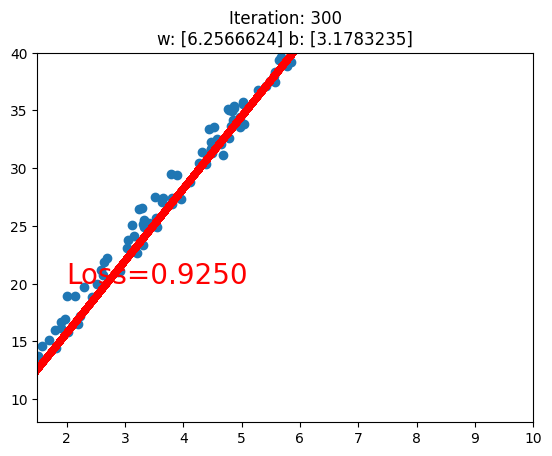

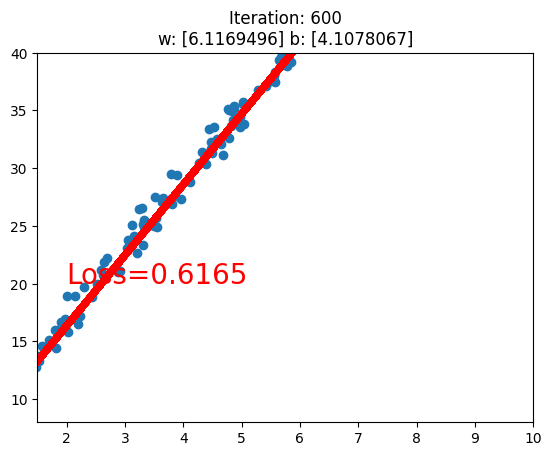

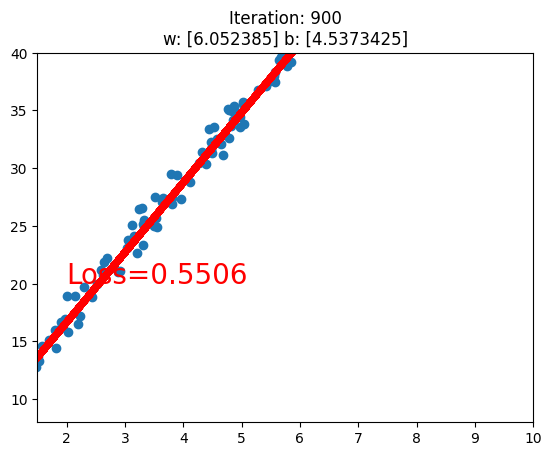

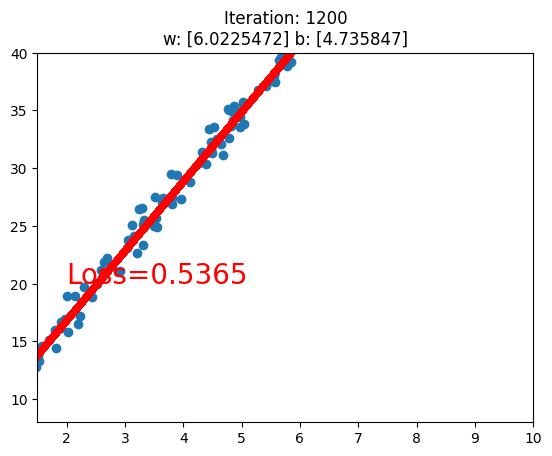

In [30]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.01  # 学习率
best_loss = float("inf")

# 创建训练数据
x = torch.rand(200, 1) * 10  # x data (tensor), shape=(20, 1)
y = 6*x + (5 + torch.randn(200, 1))  # y data (tensor), shape=(20, 1)

# 构建线性回归参数
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

for iteration in range(10000):

    # 前向传播
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # 计算 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()
    
    current_loss = loss.item()
    if current_loss < best_loss:
        best_loss = current_loss
        best_w = w
        best_b = b
        
    # 绘图
    if iteration%300 == 0:
        if loss.data.numpy() < 3:
            plt.scatter(x.data.numpy(), y.data.numpy())
            plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
            plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
            plt.xlim(1.5, 10)
            plt.ylim(8, 40)
            plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
            plt.pause(0.5)

            if loss.data.numpy() < 0.55:
                break
            
    # 更新参数
    w.data.sub_(lr * w.grad)
    b.data.sub_(lr * b.grad) 
    
    # 梯度清零
    w.grad.zero_()
    b.grad.zero_()

In [31]:
best_loss, best_w, best_b

(0.5364829897880554,
 tensor([6.0225], requires_grad=True),
 tensor([4.7358], requires_grad=True))